# Course: Introduction to Machine Learning and Data Mining.

## Course project. Analysis of movies and on-screen deaths

### Author: Yulia Gurova

### Project proposal

The project is based on the dataset of movies, containing counts of on-screan deaths.  The analysis of the data may reveal how the ratings depend on the
number of deaths, how this number relates to the release year and so on.
Moreover, genre and length of the film combined with on-screen violence may
provide information on age ratings. This is a good set for the classification
and clustering problems. This analysis may be the first step to the automatization of age rating
systems. Moreover it may be helpful in the development of recommendation
systems.

### Projected tasks and methods (problem statement)

1. The IMDB rating prediction.  Ratings are the feature of interest. Actually, there are some real projects on the evaluation the film rating and (correspondinately) ravenues depending on some features. Producers relay on them when they choose the cast, location and other paremeters of the future movie or tv series. **Regression** is chosen here as method of analysis. 

As for regression models the data should be scaled for the better results, several scalers should be tried to find the best.

2. **Binary classification** is used for sucsess prediction (based on IMDB rating separation). Here the logistic regression and random forest are choden as the methods. 

Ensembling is chosen here as there are only 545 observations ehich is note really a lot. So here the ensembling of trees, each built on the subsample (with returns) seem to be a good method of analysis (bootstrap). As this model overfits easily, we should separate some validation samle before the training. 

The resulting trees could be used to define the clusters of genres that are close incide the cluster (have the same meaning for the predictions) and destinct between the clusters. Also  the information ablut the genres may be aggregated using PCA. Then new features can improve the quality of the classification.

3. **Multiclass classification**. MPAA_rating based on the movie features. The machinary classification of age ristrictions is real task from the film industry. Here logistic regression models are used.

All previous results about the genres may be used here. Also the most interesting feature, the bodycount, should be of a great use for prediction of the age ratings. 

The problem to solve here for the depending variable is the reclassification of ratings. The problem is that the standards were changing in time, and the ratings, that we sign to films at the year of release, mostly do not exist anymore. So as the part of preprocessing, all old ratings should be classified to the modern scale.

### Dataset discription 

There are 545 movies and
8 characteristics including names, so the dataset meets the requirements.
The sourse for the data is the thematic web-site [moviebodycounts.com](http://www.moviebodycounts.com/).
This dataset was processed and published on [figshare.com](https://figshare.com/articles/On_screen_movie_kill_counts_for_hundreds_of_films/889719). It was gathered
in accordance with the rules, which are published on the web-site. We took
several characteristics for the consideration: the release year of the film,
MPAA rating (Motion Picture Association of America film rating system, restrictions depending on age),
genre or genres, the name of the director, the lenth of the film in minutes,
IMDB rating based on user ratings. The main feature that we consider is
the number of on-screen deaths in the movie.

In [0]:
import pandas as pd
import numpy as np

import sklearn as sk
import sklearn.metrics as mtr
import sklearn.model_selection as ms
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt


RANDOM_SEED=25
sns.set_context("paper")
sns.set(style='darkgrid', font_scale=1.25)

In [0]:
# import the dataset
df = pd.read_csv('filmdeathcounts.csv', sep=',')
print(len(df))
df.head(15)

545


,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating
0,24 Hour Party People,2002,7,R,Biography|Comedy|Drama|Music,Michael Winterbottom,117,7.3
1,28 Days Later,2002,53,R,Horror|Sci-Fi|Thriller,Danny Boyle,113,7.6
2,28 Weeks Later,2007,212,R,Horror|Sci-Fi|Thriller,Juan Carlos Fresnadillo,100,7.0
3,30 Days of Night,2007,67,R,Horror|Thriller,David Slade,113,6.6
4,300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7
5,3:10 To Yuma,2007,45,R,Adventure|Crime|Drama|Western,James Mangold,122,7.8
6,8MM,1999,1,R,Crime|Mystery|Thriller,Joel Schumacher,123,6.4
7,A Better Tomorrow,1986,65,R,Action|Crime|Drama|Thriller,John Woo,95,7.5
8,A Better Tomorrow II,1987,199,R,Action|Crime|Drama|Thriller,John Woo,105,7.3
9,A Bridge Too Far,1977,243,PG,Drama|History|War,Richard Attenborough,175,7.4


In [0]:
# split the genres to the list
genres = set()
for i in range(len(df)):
    l = df.Genre[i]
    g = l.split('|')
    df.Genre[i] = g
    for word in g:
        genres.add(word)
genres = {'Comedy', 'Adventure', 'Thriller', 'Western', 'Drama', 'Crime', 'Romance', 'Sport', 'Musical', 'Mystery', 'Fantasy', 'Music', 'Animation', 'History', 'Documentary', 'Family', 'Action', 'War', 'Horror', 'SciFi', 'Biography', 'FilmNoir'}
print(genres)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


{'Biography', 'Horror', 'Music', 'History', 'Adventure', 'Drama', 'Animation', 'Thriller', 'Documentary', 'Romance', 'Western', 'War', 'Action', 'FilmNoir', 'Mystery', 'Family', 'Comedy', 'Fantasy', 'Sport', 'SciFi', 'Musical', 'Crime'}


In [0]:
for g in genres:
    df[g]=0
df.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Biography,Horror,Music,History,Adventure,Drama,Animation,Thriller,Documentary,Romance,Western,War,Action,FilmNoir,Mystery,Family,Comedy,Fantasy,Sport,SciFi,Musical,Crime
0,24 Hour Party People,2002,7,R,"[Biography, Comedy, Drama, Music]",Michael Winterbottom,117,7.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,28 Days Later,2002,53,R,"[Horror, Sci-Fi, Thriller]",Danny Boyle,113,7.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,28 Weeks Later,2007,212,R,"[Horror, Sci-Fi, Thriller]",Juan Carlos Fresnadillo,100,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,30 Days of Night,2007,67,R,"[Horror, Thriller]",David Slade,113,6.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,300,2007,600,R,"[Action, Fantasy, History, War]",Zack Snyder,117,7.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# separate the ganres
for i in range(len(df)):
        g = df.Genre[i]
        if 'Comedy' in g:
            df.Comedy[i] = 1
        if 'Adventure' in g:
            df.Adventure[i] = 1
        if 'Thriller' in g:
            df.Thriller[i] = 1
        if 'Western' in g:
            df.Western[i] = 1
        if 'Drama' in g:
            df.Drama[i] = 1
        if 'Crime' in g:
            df.Crime[i] = 1
        if 'Romance' in g:
            df.Romance[i] = 1
        if 'Sport' in g:
            df.Sport[i] = 1
        if 'Musical' in g:
            df.Musical[i] = 1
        if 'Mystery' in g:
            df.Mystery[i] = 1
        if 'Fantasy' in g:
            df.Fantasy[i] = 1
        if 'Music' in g:
            df.Music[i] = 1
        if 'Animation' in g:
            df.Adventure[i] = 1
        if 'History' in g:
            df.Animation[i] = 1
        if 'Documentary' in g:
            df.Documentary[i] = 1
        if 'Family' in g:
            df.Family[i] = 1
        if 'Action' in g:
            df.Action[i] = 1
        if 'War' in g:
            df.War[i] = 1
        if 'Horror' in g:
            df.Horror[i] = 1
        if 'Sci-Fi' in g:
            df.SciFi[i] = 1
        if 'Biography' in g:
            df.Mystery[i] = 1      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is

In [0]:
# check 1
df.Biography[2]

0

In [0]:
#check 2
df.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Biography,Horror,Music,History,Adventure,Drama,Animation,Thriller,Documentary,Romance,Western,War,Action,FilmNoir,Mystery,Family,Comedy,Fantasy,Sport,SciFi,Musical,Crime
0,24 Hour Party People,2002,7,R,"[Biography, Comedy, Drama, Music]",Michael Winterbottom,117,7.3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,28 Days Later,2002,53,R,"[Horror, Sci-Fi, Thriller]",Danny Boyle,113,7.6,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,28 Weeks Later,2007,212,R,"[Horror, Sci-Fi, Thriller]",Juan Carlos Fresnadillo,100,7.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,30 Days of Night,2007,67,R,"[Horror, Thriller]",David Slade,113,6.6,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,300,2007,600,R,"[Action, Fantasy, History, War]",Zack Snyder,117,7.7,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0


In [0]:
# save the database
df.to_pickle('data.pkl')  

Now the Genres column is splitted and every film has vector that discribes the set of its genres. Now we explore the correlations between the ganres. The purpose here is to connect them into some clusters, so that easier to use them in further analysis. 

In [0]:
Genre = df.Genre
df.drop(columns='Genre')

,Film,Year,Body_Count,MPAA_Rating,Director,Length_Minutes,IMDB_Rating,Biography,Horror,Music,History,Adventure,Drama,Animation,Thriller,Documentary,Romance,Western,War,Action,FilmNoir,Mystery,Family,Comedy,Fantasy,Sport,SciFi,Musical,Crime
0,24 Hour Party People,2002,7,R,Michael Winterbottom,117,7.3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,28 Days Later,2002,53,R,Danny Boyle,113,7.6,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,28 Weeks Later,2007,212,R,Juan Carlos Fresnadillo,100,7.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,30 Days of Night,2007,67,R,David Slade,113,6.6,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,300,2007,600,R,Zack Snyder,117,7.7,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
5,3:10 To Yuma,2007,45,R,James Mangold,122,7.8,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
6,8MM,1999,1,R,Joel Schumacher,123,6.4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
7,A Better Tomorrow,1986,65,R,John Woo,95,7.5,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
8,A Better Tomorrow II,1987,199,R,John Woo,105,7.3,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
9,A Bridge Too Far,1977,243,PG,Richard Attenborough,175,7.4,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [0]:
genres_count = []
counts=[]
objects=[]
for k in genres:
    genres_count.append([k,sum(df[k])])
genres_count = sorted(genres_count, key=lambda item: item[1], reverse=True)
for k in genres_count:
    objects.append(k[0])
    counts.append(k[1])
    print(k)

['Action', 342]
['Thriller', 264]
['Drama', 220]
['Crime', 181]
['Adventure', 158]
['SciFi', 99]
['Comedy', 78]
['Mystery', 65]
['Horror', 59]
['Fantasy', 55]
['War', 48]
['Animation', 36]
['Romance', 25]
['Western', 23]
['Family', 11]
['Music', 5]
['Sport', 3]
['Musical', 2]
['Documentary', 1]
['Biography', 0]
['History', 0]
['FilmNoir', 0]


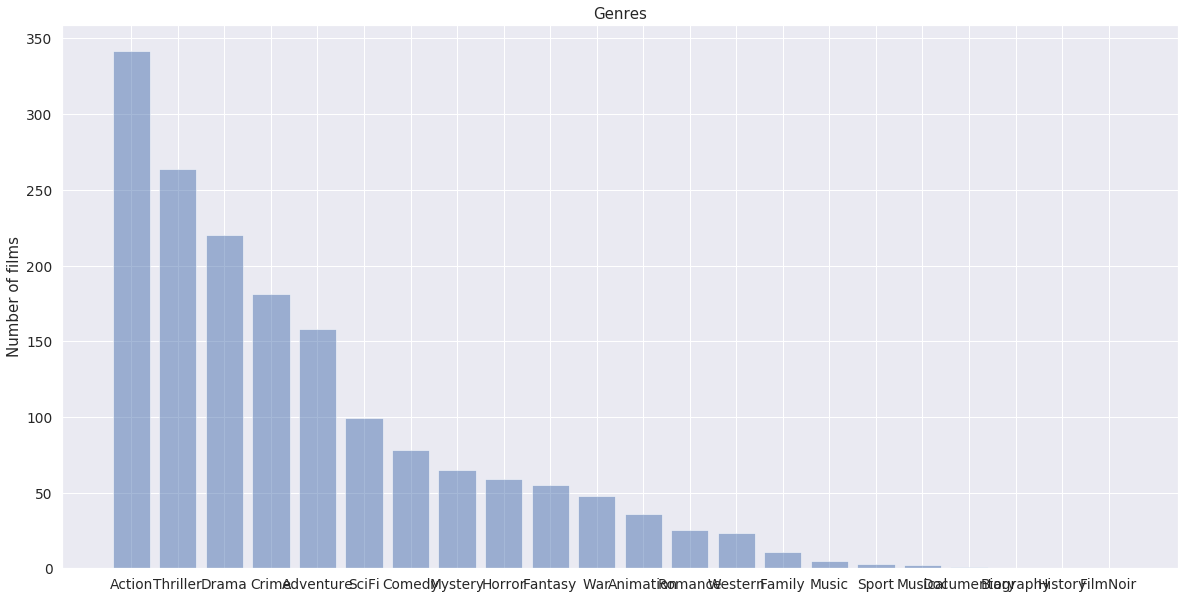

In [0]:
y_pos = range(len(objects))

plt.figure(1,figsize = (20,10))
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of films')
plt.title('Genres')

plt.show()

First we drop the genres that have small amount of films presented. So the vectors are dummy variables with the basic class (no class/too small class) 

In [0]:
todrop=[]
for k in genres_count:
    if k[1]<30:
        todrop.append(k[0])
df=df.drop(todrop,axis=1)

In [0]:
df.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Horror,Adventure,Drama,Animation,Thriller,War,Action,Mystery,Comedy,Fantasy,SciFi,Crime
0,24 Hour Party People,2002,7,R,"[Biography, Comedy, Drama, Music]",Michael Winterbottom,117,7.3,0,0,1,0,0,0,0,1,1,0,0,0
1,28 Days Later,2002,53,R,"[Horror, Sci-Fi, Thriller]",Danny Boyle,113,7.6,1,0,0,0,1,0,0,0,0,0,1,0
2,28 Weeks Later,2007,212,R,"[Horror, Sci-Fi, Thriller]",Juan Carlos Fresnadillo,100,7.0,1,0,0,0,1,0,0,0,0,0,1,0
3,30 Days of Night,2007,67,R,"[Horror, Thriller]",David Slade,113,6.6,1,0,0,0,1,0,0,0,0,0,0,0
4,300,2007,600,R,"[Action, Fantasy, History, War]",Zack Snyder,117,7.7,0,0,0,1,0,1,1,0,0,1,0,0


Here we form lists of features for different purposes. For some methods only the numerical features are necessary, for some others we may use the genres vector, of the cathegorical features as director of the MPAA_rating

In [0]:

features = df.columns.values
f_g = list(features[8:])
f_nong = list(features[:8])
f_num = [features[1],features[2],features[6],features[7]]
print(f_g, f_nong,f_num)

['Horror', 'Adventure', 'Drama', 'Animation', 'Thriller', 'War', 'Action', 'Mystery', 'Comedy', 'Fantasy', 'SciFi', 'Crime'] ['Film', 'Year', 'Body_Count', 'MPAA_Rating', 'Genre', 'Director', 'Length_Minutes', 'IMDB_Rating'] ['Year', 'Body_Count', 'Length_Minutes', 'IMDB_Rating']


Consider the pairplots for numerical features:

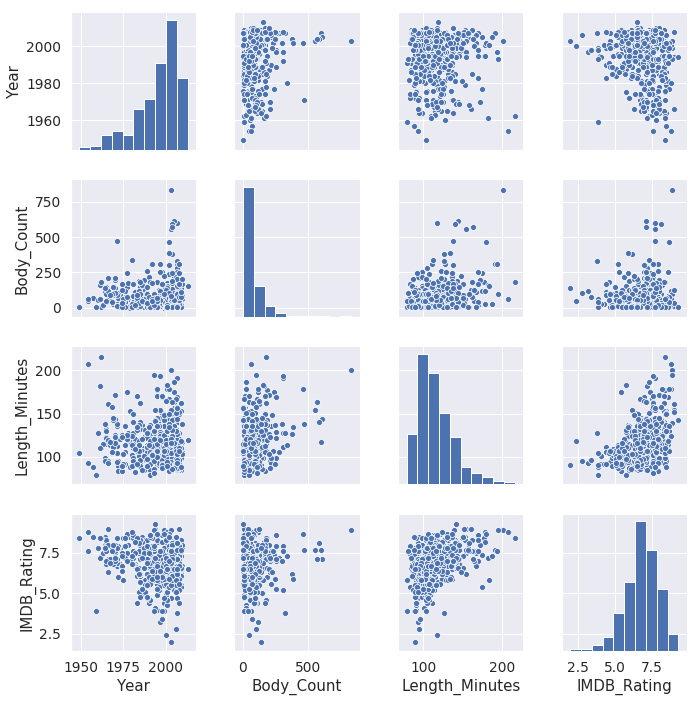

In [0]:
sns.pairplot(df, vars=f_num)

Consider the correlations between the genres. Here there are the co-occurences count (calculated as the matrics multiplication by inself) and the correlation matrix, illustrated by colors for easier understanding

In [0]:
df_asint = df[f_g].astype(int)
cooc = df_asint.T.dot(df_asint)
cooc

,Horror,Adventure,Drama,Animation,Thriller,War,Action,Mystery,Comedy,Fantasy,SciFi,Crime
Horror,59,7,5,0,24,0,19,4,11,10,21,2
Adventure,7,158,31,4,51,10,131,9,17,34,42,19
Drama,5,31,220,32,99,36,103,45,14,8,14,96
Animation,0,4,32,36,5,15,14,8,2,2,0,1
Thriller,24,51,99,5,264,6,179,36,28,10,48,139
War,0,10,36,15,6,48,27,2,8,2,1,1
Action,19,131,103,14,179,27,342,21,41,40,71,116
Mystery,4,9,45,8,36,2,21,65,6,1,6,26
Comedy,11,17,14,2,28,8,41,6,78,8,3,28
Fantasy,10,34,8,2,10,2,40,1,8,55,17,1


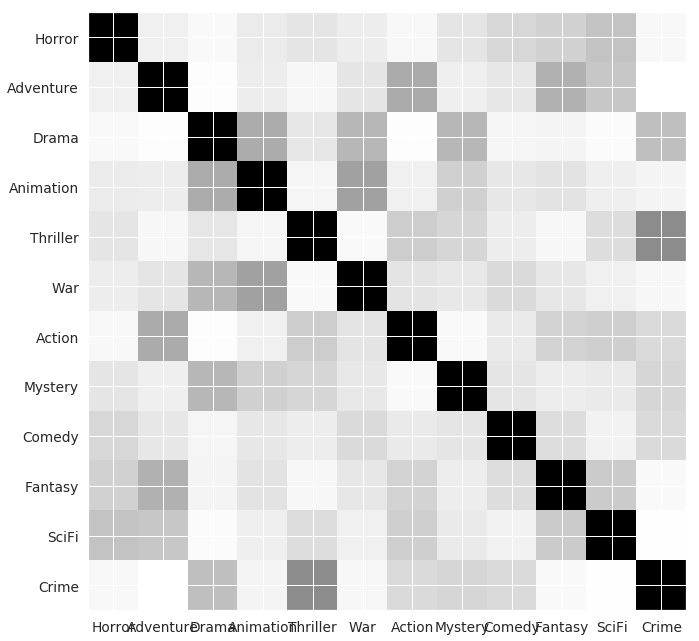

In [0]:
D = np.corrcoef(df[f_g].astype(int).T)
plt.figure(1,figsize=(11,11))
plt.imshow(D, cmap = 'Greys', interpolation = 'None')
plt.xticks(range(len(D)),(f_g))
plt.yticks(range(len(D)),(f_g))
plt.show()

### Linear regression

First of the methods I use linear regression model for the numerical features. As I know from the course, normalisation is necessary for better results. Here I do not separate the observations for test and train as there are not so many observations compared to the number of features and there is no treat of overfitting, I think

In [0]:
scaler = sk.preprocessing.StandardScaler()
# x_scaled = scaler.fit_transform(df[f_num])
x_scaled = sk.preprocessing.scale(df[f_num]) 

In [0]:
x_num_scaled=pd.DataFrame(x_scaled,columns=f_num)
x_num_scaled.head()

,Year,Body_Count,Length_Minutes,IMDB_Rating
0,0.534231,-0.703610,0.037600,0.417114
1,0.534231,-0.206555,-0.138674,0.686778
2,0.938166,1.511529,-0.711564,0.147450
3,0.938166,-0.055277,-0.138674,-0.212103
4,0.938166,5.704084,0.037600,0.776667


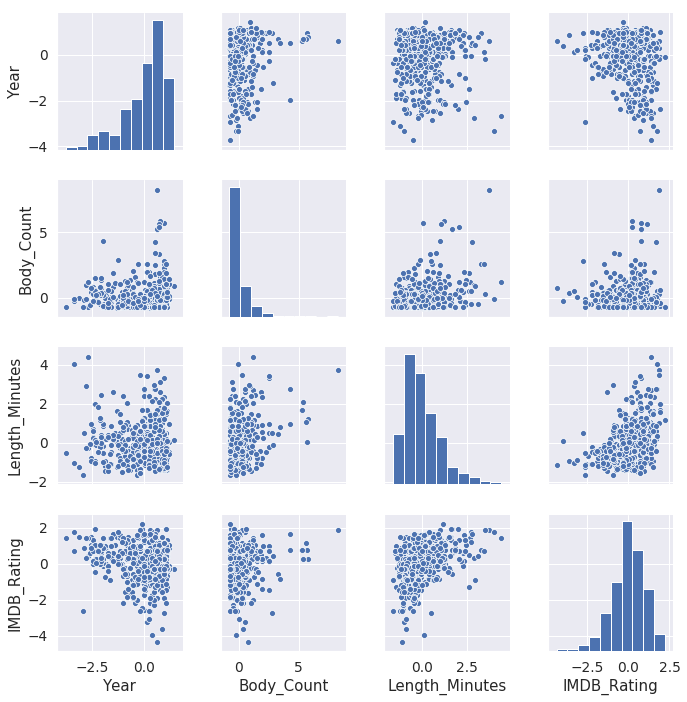

In [0]:
sns.pairplot(x_num_scaled)

**The IMDB rating was chosen for the dependent variable,** as ratings are the feature of interest. Actually, there are some real projects on the evaluation the film rating and (correspondinately) ravenues on the features. Producers relay on them when the choose the cast, location and other paremeters of the future movie or tv series

In [0]:
y_train = x_num_scaled['IMDB_Rating']
x_train = x_num_scaled.drop(columns='IMDB_Rating')
y_train.head()

0    0.417114
1    0.686778
2    0.147450
3   -0.212103
4    0.776667
Name: IMDB_Rating, dtype: float64

In [0]:
model = sk.linear_model.LinearRegression()
model_lr = model.fit(np.array(x_train),np.array(y_train))

def print_reg_mtr(y_train, y_pred):
    print('MSE = ',mtr.mean_squared_error(y_train,y_pred))
    print('MAE = ',mtr.mean_absolute_error(y_train,y_pred))
    print('R^2 = ',mtr.r2_score(y_train,y_pred))

y_pred = model_lr.predict(x_train)
print_reg_mtr(y_train,y_pred)

MSE =  0.7685439926678694
MAE =  0.6840628125909692
R^2 =  0.23145600733213068


In [0]:
model_lr.score(x_train,y_train)

0.23145600733213068

Now we consider the feature importances for the predictions

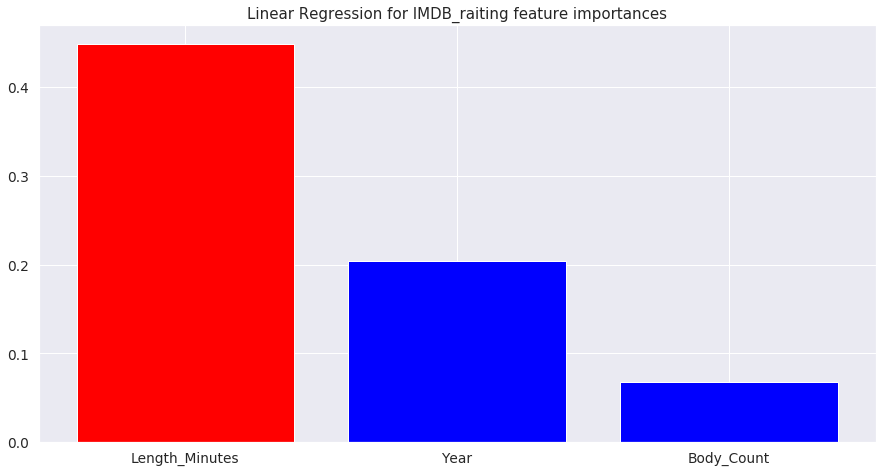

In [0]:
lr_feature_importance = pd.DataFrame({'feature': x_train.columns.values, 
                                      'coeff': model_lr.coef_, 'abs(coeff)': np.abs(model_lr.coef_)})
lr_feature_importance.sort_values('abs(coeff)', ascending=False).head(10)

coefs = lr_feature_importance['coeff'].values
color = np.array(['red' if c > 0 else 'blue' for c in coefs])
coefs = np.abs(coefs)
indices = np.argsort(coefs)[::-1]


fig, ax = plt.subplots()
fig.set_size_inches(15,10)
plt.title("Linear Regression for IMDB_raiting feature importances")
plt.bar(range(len(coefs)), coefs[indices], color=color[indices], align="center")
plt.xticks(range(len(coefs)), x_train.columns.values[indices])
plt.subplots_adjust(bottom=0.3)
plt.show()


coef = model_lr.coef_
names = x_train.columns.values

abs_coefs = np.abs(coef)


### Binary classification

Next model is the binary classification. 

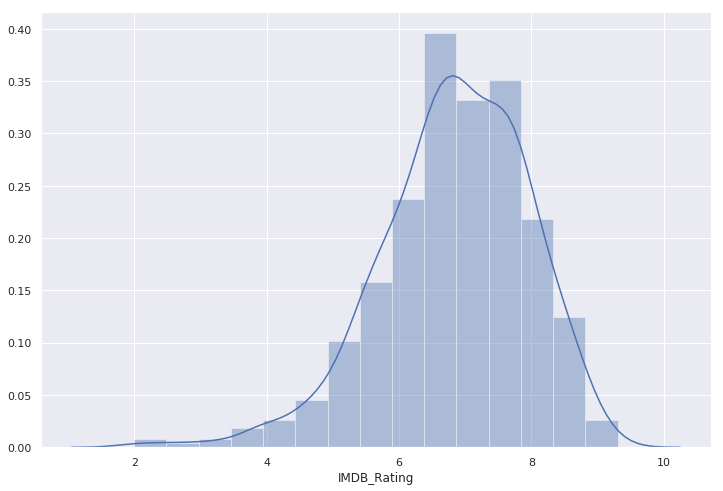

In [0]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(df['IMDB_Rating'],bins=15)

In [0]:
def separator(row):
    if row['IMDB_Rating']>=7.5:
        return 'high'
    else:
        return 'low'    
    
def separator_y(row):
    if row['IMDB_Rating']>=7.5:
        return 1
    else:
        return 0   
    
df['sep']=df.apply(lambda row:separator_y(row),axis=1)

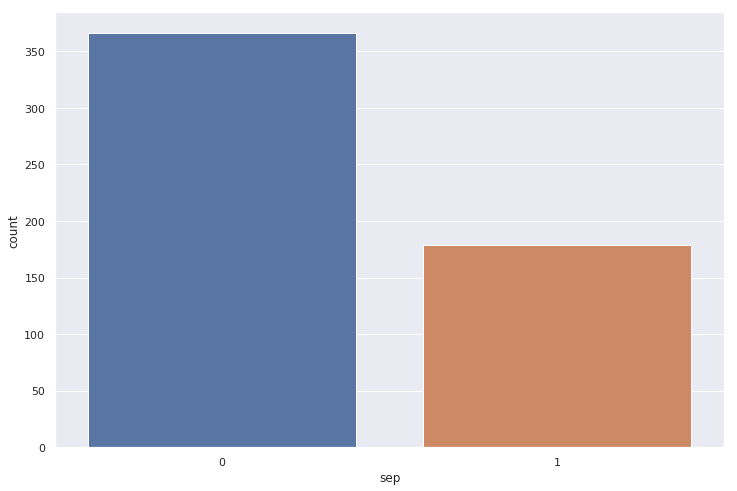

In [0]:
sns.countplot(df['sep'])

In [0]:
y_dev = df['sep']
x_dev = df.drop(columns = ['Film','sep', 'MPAA_Rating', 'Genre', 'Director','IMDB_Rating'],axis=1)

x_train, x_test, y_train, y_test = ms.train_test_split(x_dev,y_dev, test_size = 0.2, shuffle=True, random_state=1)

In [0]:
x_test.head()

,Year,Body_Count,Length_Minutes,Horror,Adventure,Drama,Animation,Thriller,War,Action,Mystery,Comedy,Fantasy,SciFi,Crime
62,2007,256,98,1,0,1,0,0,0,0,0,0,1,0,0
247,1985,12,107,0,1,0,0,1,0,1,0,0,0,0,0
142,1987,8,84,1,0,0,0,0,0,0,0,1,0,0,0
107,2002,8,118,0,0,1,0,1,0,0,0,0,0,0,1
483,1991,8,118,0,0,1,0,1,0,0,0,0,0,0,1


In [0]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50, max_depth = 15)
model_rf = model.fit(x_train,y_train)

In [0]:
tree=model_rf.estimators_[0]
tree.tree_

<BarContainer object of 15 artists>

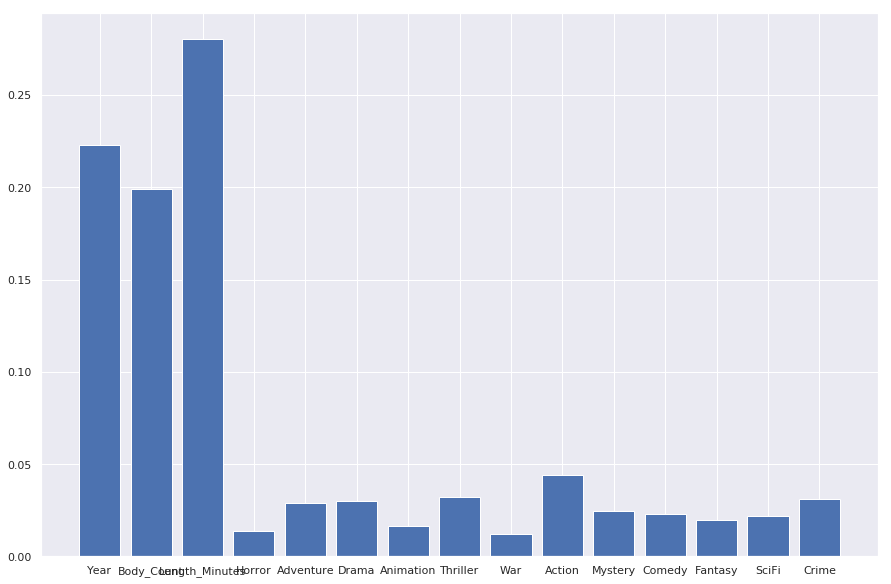

In [0]:
plt.figure(1,figsize=(15,10))
plt.bar(list(x_train.columns), model_rf.feature_importances_)

In [0]:
y_pred = model_rf.predict(x_test)

In [0]:
x_test['y'] = y_test
x_test['y_pred']=y_pred
x_test.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Year,Body_Count,Length_Minutes,Horror,Adventure,Drama,Animation,Thriller,War,Action,Mystery,Comedy,Fantasy,SciFi,Crime,y,y_pred
62,2007,256,98,1,0,1,0,0,0,0,0,0,1,0,0,0,0
247,1985,12,107,0,1,0,0,1,0,1,0,0,0,0,0,0,0
142,1987,8,84,1,0,0,0,0,0,0,0,1,0,0,0,1,0
107,2002,8,118,0,0,1,0,1,0,0,0,0,0,0,1,0,0
483,1991,8,118,0,0,1,0,1,0,0,0,0,0,0,1,1,0
351,2010,171,138,0,0,1,0,1,0,0,1,0,0,0,0,1,1
516,1995,47,100,0,0,0,0,1,0,1,0,0,0,0,0,0,0
47,1991,3,116,0,0,1,0,0,0,0,1,0,0,0,0,1,1
481,1994,4,142,0,0,1,0,0,0,0,0,0,0,0,1,1,1
90,1985,75,140,0,0,1,1,0,1,0,0,0,0,0,0,1,1


In [0]:
def print_class_mtr(y_train, y_pred):
    print('accuracy = ',mtr.accuracy_score(y_train,y_pred))
    print('F1= ',mtr.f1_score(y_train,y_pred))
    print('roc_auc = ',mtr.roc_auc_score(y_train,y_pred))


print_class_mtr(y_test,y_pred)
for i in range(len(y_test)):
  print(i,(list(y_test)[i]==y_pred[i]),y_pred[i])


accuracy =  0.7155963302752294
F1=  0.5079365079365079
roc_auc =  0.6531627576403696
0 True 0
1 True 0
2 False 0
3 True 0
4 False 0
5 True 1
6 True 0
7 True 1
8 True 1
9 True 1
10 True 0
11 False 0
12 True 0
13 True 0
14 True 0
15 True 0
16 True 1
17 True 1
18 False 0
19 True 0
20 True 0
21 True 0
22 True 0
23 False 0
24 False 1
25 False 0
26 True 0
27 True 1
28 False 1
29 True 0
30 True 0
31 False 0
32 False 0
33 True 0
34 True 0
35 False 0
36 True 0
37 True 0
38 True 1
39 False 0
40 True 0
41 True 0
42 True 0
43 True 0
44 True 0
45 True 0
46 True 1
47 False 0
48 False 1
49 True 0
50 False 0
51 True 0
52 False 0
53 True 0
54 True 0
55 False 0
56 True 0
57 True 0
58 True 1
59 True 1
60 False 1
61 True 0
62 True 0
63 True 0
64 True 0
65 True 0
66 True 0
67 True 1
68 True 0
69 False 0
70 False 0
71 True 0
72 True 0
73 True 0
74 True 0
75 True 0
76 False 0
77 False 0
78 True 0
79 True 0
80 True 0
81 True 0
82 True 0
83 True 1
84 True 0
85 False 0
86 True 0
87 True 0
88 False 0
89 False 1


## Multiclass classification

<BarContainer object of 12 artists>

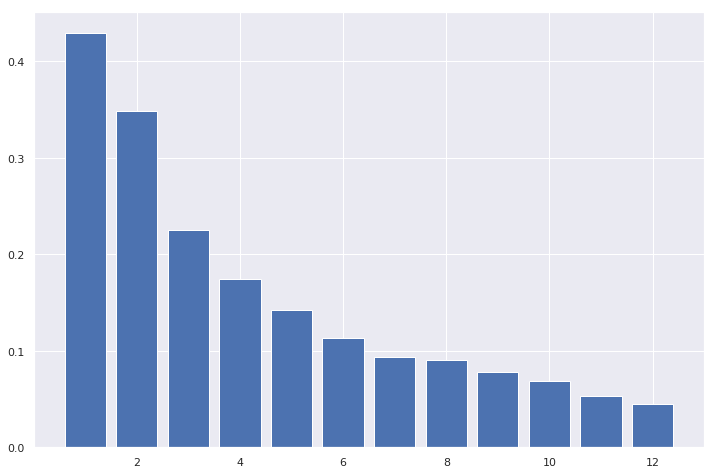

In [0]:
model = PCA()
model_PCA = model.fit(df[f_g])

#print(model_PCA.explained_variance_ )
#print(model_PCA.components_ )

# fig = plt.figure(figsize=(15,10))
plt.bar(range(1,len(model_PCA.explained_variance_ratio_ )+1), model_PCA.explained_variance_)

 

12
12


Text(0.5, 1.0, 'PC 4')

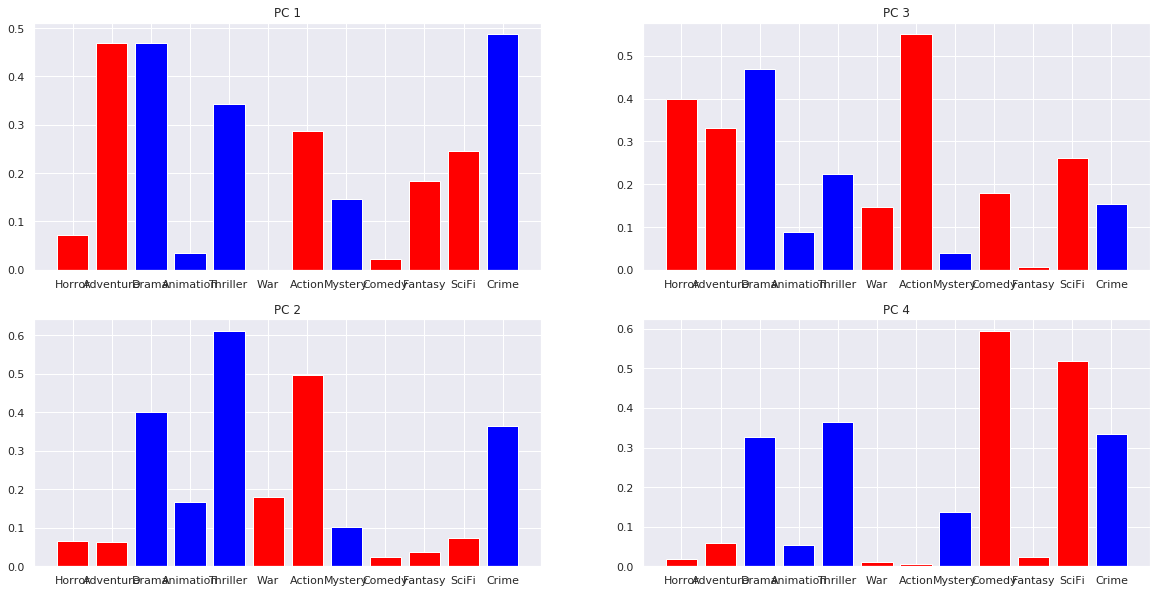

In [0]:
print(len(model_PCA.components_[0]))
print(len([f_g][0]))

fig = plt.figure( figsize=(20,10))
ax=fig.subplots(2,2)
ax[0][0].bar([f_g][0],np.abs(model_PCA.components_[0]), color = np.array(['red' if c > 0 else 'blue' for c in model_PCA.components_[0]]))
ax[0][0].set_title('PC 1')
ax[1][0].bar([f_g][0],np.abs(model_PCA.components_[1]),color = np.array(['red' if c > 0 else 'blue' for c in model_PCA.components_[0]]))
ax[1][0].set_title('PC 2')
ax[0][1].bar([f_g][0],np.abs(model_PCA.components_[2]),color = np.array(['red' if c > 0 else 'blue' for c in model_PCA.components_[0]]))
ax[0][1].set_title('PC 3')
ax[1][1].bar([f_g][0],np.abs(model_PCA.components_[3]),color = np.array(['red' if c > 0 else 'blue' for c in model_PCA.components_[0]]))
ax[1][1].set_title('PC 4')

In [0]:
df['PC1'] = df.apply(lambda row: np.multiply(row,model_PCA.components_[0]),axis=1)

AttributeError: ignored

In [0]:
df=pd.read_pkl('data.pkl')

AttributeError: ignored

'data.pkl'

## Summary of the results

## Discussion

In [0]:
groups = ['Базовая фитотерапия',
'Борьба с вредными привычками',
'Вакцины и сыворотки',
'Витамины и обмен веществ',
'Гинекология',
'Дерматология',
'Диагностические средства',
'Дыхательная система',
'Зрение и слух',
'Костно-мышечная система',
'Кровь и кроветворение',
'Лечений инфекций',
'Мочеполовая система',
'Нервная система',
'Онкология и иммунология',
'От аллергии',
'От боли и воспаления',
'От варикоза',
'От паразитов',
'Пищеварительный тракт',
'Простуда и грипп',
'Сердечно-сосудистая система',
'Эндокринология']
groups_map=[]
map_dict={}
for i in range(101,101+len(groups)):
  print('if Группа = "%s" then com = %i;'%(groups[i-101],i))
  groups_map.append([groups[i-101],i])
  map_dict[i]=groups[i-101]

if Группа = "Базовая фитотерапия" then com = 101;
if Группа = "Борьба с вредными привычками" then com = 102;
if Группа = "Вакцины и сыворотки" then com = 103;
if Группа = "Витамины и обмен веществ" then com = 104;
if Группа = "Гинекология" then com = 105;
if Группа = "Дерматология" then com = 106;
if Группа = "Диагностические средства" then com = 107;
if Группа = "Дыхательная система" then com = 108;
if Группа = "Зрение и слух" then com = 109;
if Группа = "Костно-мышечная система" then com = 110;
if Группа = "Кровь и кроветворение" then com = 111;
if Группа = "Лечений инфекций" then com = 112;
if Группа = "Мочеполовая система" then com = 113;
if Группа = "Нервная система" then com = 114;
if Группа = "Онкология и иммунология" then com = 115;
if Группа = "От аллергии" then com = 116;
if Группа = "От боли и воспаления" then com = 117;
if Группа = "От варикоза" then com = 118;
if Группа = "От паразитов" then com = 119;
if Группа = "Пищеварительный тракт" then com = 120;
if Группа = "Просту

In [0]:
map_dict

{101: 'Базовая фитотерапия',
 102: 'Борьба с вредными привычками',
 103: 'Вакцины и сыворотки',
 104: 'Витамины и обмен веществ',
 105: 'Гинекология',
 106: 'Дерматология',
 107: 'Диагностические средства',
 108: 'Дыхательная система',
 109: 'Зрение и слух',
 110: 'Костно-мышечная система',
 111: 'Кровь и кроветворение',
 112: 'Лечений инфекций',
 113: 'Мочеполовая система',
 114: 'Нервная система',
 115: 'Онкология и иммунология',
 116: 'От аллергии',
 117: 'От боли и воспаления',
 118: 'От варикоза',
 119: 'От паразитов',
 120: 'Пищеварительный тракт',
 121: 'Простуда и грипп',
 122: 'Сердечно-сосудистая система',
 123: 'Эндокринология'}

In [0]:
groups = ['Базовая фитотерапия',
'Борьба с вредными привычками',
'Вакцины и сыворотки',
'Витамины и обмен веществ',
'Гинекология',
'Дерматология',
'Диагностические средства',
'Дыхательная система',
'Зрение и слух',
'Костно-мышечная система',
'Кровь и кроветворение',
'Лечений инфекций',
'Мочеполовая система',
'Нервная система',
'Онкология и иммунология',
'От аллергии',
'От боли и воспаления',
'От варикоза',
'От паразитов',
'Пищеварительный тракт',
'Простуда и грипп',
'Сердечно-сосудистая система',
'Эндокринология']
groups_map=[]
map_dict={}
for i in range(101,101+len(groups)):
  print('if Группа = "%s" then com = %i;'%(groups[i-101],i))
  groups_map.append([groups[i-101],i])
  map_dict[i]=groups[i-101]

In [0]:
groups = ['Базовая фитотерапия',
'Борьба с вредными привычками',
'Вакцины и сыворотки',
'Витамины и обмен веществ',
'Гинекология',
'Дерматология',
'Диагностические средства',
'Дыхательная система',
'Зрение и слух',
'Костно-мышечная система',
'Кровь и кроветворение',
'Лечений инфекций',
'Мочеполовая система',
'Нервная система',
'Онкология и иммунология',
'От аллергии',
'От боли и воспаления',
'От варикоза',
'От паразитов',
'Пищеварительный тракт',
'Простуда и грипп',
'Сердечно-сосудистая система',
'Эндокринология']
groups_map=[]
map_dict={}
for i in range(101,101+len(groups)):
  print('if Группа = "%s" then com = %i;'%(groups[i-101],i))
  groups_map.append([groups[i-101],i])
  map_dict[i]=groups[i-101]